In [ ]:
import numpy as np
import matplotlib
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import sklearn
import tensorflow as tf
import plotly.graph_objects as go
pd.set_option("display.max_columns",None)

In [ ]:
#Lets load the data

df=pd.read_csv("/content/sample_data/Iris.csv")
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
df.isnull().sum()
df.duplicated().sum()

np.int64(0)

In [ ]:
df.drop("Id",axis=1,inplace=True)

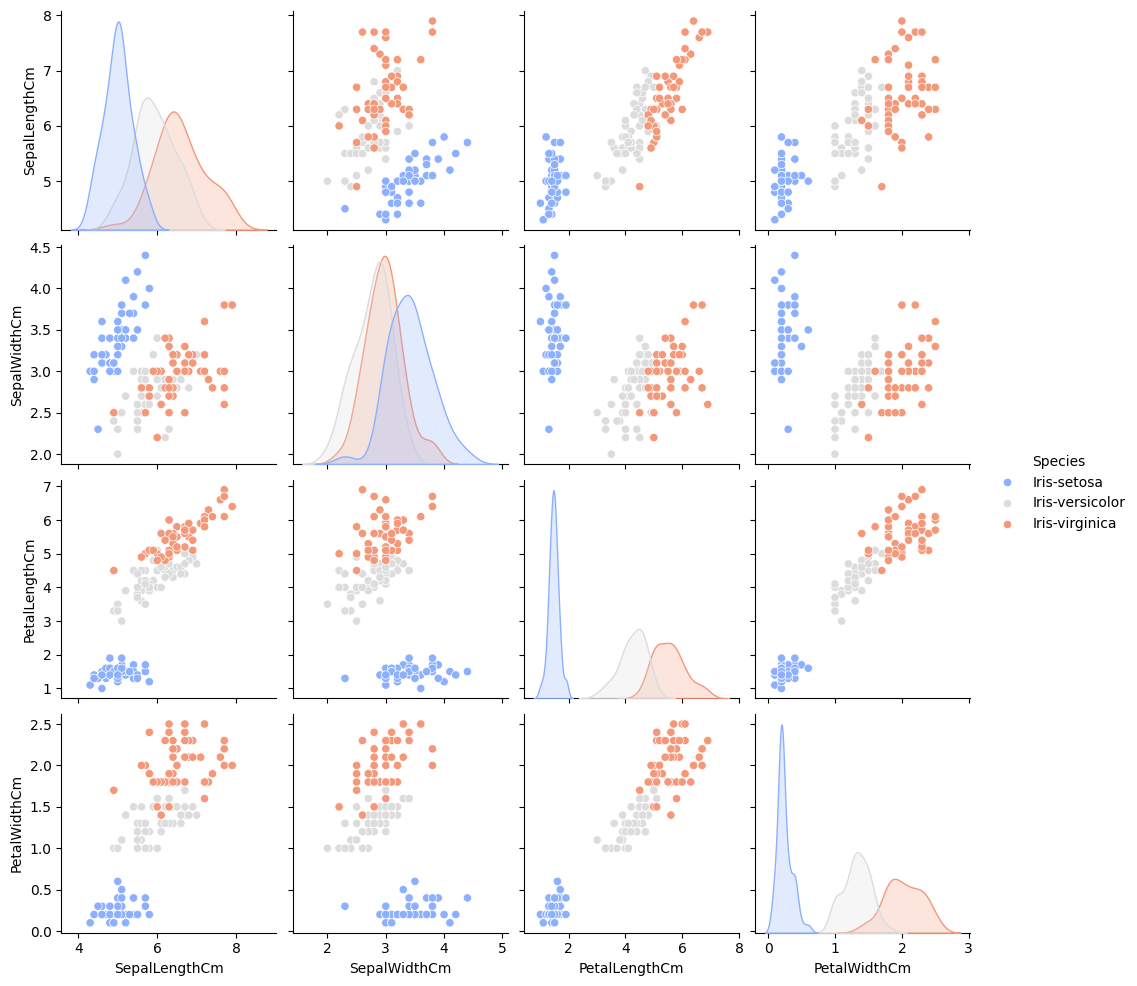

In [ ]:
sns.pairplot(df,palette="coolwarm",kind="scatter",hue="Species")

In [ ]:
numerical_cols=df.select_dtypes(include=['number']).columns.tolist()
categorical_cols=df.select_dtypes(include='object').columns.tolist()
target_col=["Species"]
input_col=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(sparse_output=False)
encoder.fit(df[categorical_cols])
col_names=encoder.get_feature_names_out(categorical_cols)
encoded_cols=pd.DataFrame(encoder.transform(df[categorical_cols]),columns=col_names)
df=df.join(encoded_cols)


target_col=encoded_cols.columns.tolist()


df.drop("Species",axis=1,inplace=True)

<Axes: >

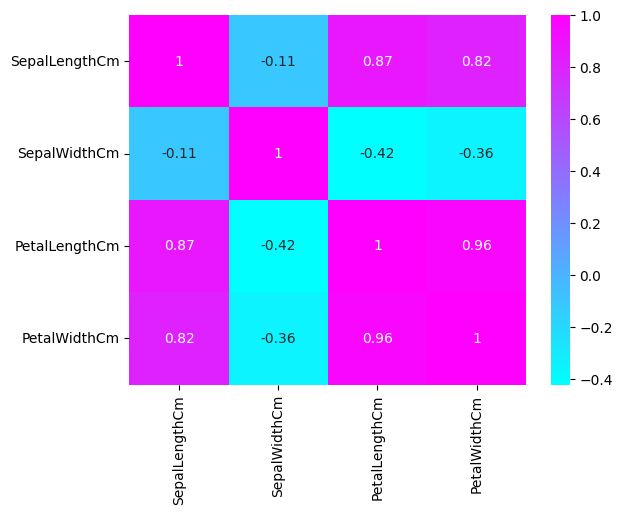

In [ ]:
sns.heatmap(df[numerical_cols].corr(),annot=True,cmap="cool")

In [ ]:
from sklearn.model_selection import train_test_split
X=df[input_col]
y=df[target_col]
X_train_full,X_test,y_train_full,y_test=train_test_split(X,y,random_state=42,train_size=0.6)

In [ ]:
X_train,X_val,y_train,y_val=train_test_split(X_train_full,y_train_full,random_state=42,train_size=0.85)

In [ ]:
X_train.shape
#y_train.shape

(76, 4)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

In [ ]:
y_train


,Species
138,Iris-virginica
94,Iris-versicolor
5,Iris-setosa
43,Iris-setosa
63,Iris-versicolor
...,...
111,Iris-virginica
91,Iris-versicolor
129,Iris-virginica
62,Iris-versicolor


In [ ]:
from sklearn.linear_model import LogisticRegression
regression=LogisticRegression(multi_class="multinomial",solver="lbfgs")
regression.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='multinomial')

In [ ]:
prediction_log=pd.DataFrame(regression.predict(X_test))
from sklearn.metrics import accuracy_score

In [ ]:
prediction_log=regression.predict(X_test)
predicted_df=pd.DataFrame(prediction_log,columns=["Predicted data"])

In [ ]:
prediction_log.shape
y_test.shape
predicted_df = predicted_df.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
comparison_df = pd.concat([predicted_df, y_test], axis=1)
accuracy_score(y_test,prediction_log)

0.9833333333333333

In [ ]:


def get_rmse(y_test,predicted_df):

    from sklearn.preprocessing import LabelEncoder
    from sklearn.metrics import root_mean_squared_error,root_mean_squared_log_error,mean_absolute_error,mean_absolute_percentage_error
    level=LabelEncoder()
    encoded_data_prd=level.fit_transform(predicted_df)
    encoded_data_act=level.fit_transform(y_test)
    rmse=root_mean_squared_error(encoded_data_act,encoded_data_prd)
    rmsel=root_mean_squared_log_error(encoded_data_act,encoded_data_prd)
    mae=mean_absolute_error(encoded_data_act,encoded_data_prd)
    mape=mean_absolute_percentage_error(encoded_data_act,encoded_data_prd)
    return rmse,rmsel,mae,mape



rmse,rmsel,mae,mape=get_rmse(y_test,predicted_df)
print(f"Root mean square:{rmse} \nroot_mean_squared_log_error:rmsel:{rmsel} \nmean_absolute_erro:{mae} \nmean_absolute_percentage_error{mape} ")

Root mean square:0.12909944487358055 
root_mean_squared_log_error:rmsel:0.05234532037237034 
mean_absolute_erro:0.016666666666666666 
mean_absolute_percentage_error0.008333333333333333 


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.svm import SVC
svr=SVC()
svr.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [ ]:
vector_predict=pd.DataFrame(svr.predict(X_test))
svr_accurecy=accuracy_score(vector_predict,y_test)

rmse,rmsel,mae,mape=get_rmse(y_test,vector_predict)
print(f"Root mean square:{rmse} \nroot_mean_squared_log_error:rmsel:{rmsel} \nmean_absolute_erro:{mae} \nmean_absolute_percentage_error{mape} ")

Root mean square:0.12909944487358055 
root_mean_squared_log_error:rmsel:0.05234532037237034 
mean_absolute_erro:0.016666666666666666 
mean_absolute_percentage_error0.008333333333333333 


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#Lest fall onto deeplearning
from sklearn.linear_model import Perceptron
perceptron=Perceptron()
perceptron.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Perceptron()

In [ ]:
per_predict=pd.DataFrame(perceptron.predict(X_test))
per_accurecy=accuracy_score(per_predict,y_test)
print(f"Perceptron accuercy:{per_accurecy}")
rmse,rmsel,mae,mape=get_rmse(y_test,per_predict)
print(f"Root mean square:{rmse} \nroot_mean_squared_log_error:rmsel:{rmsel} \nmean_absolute_erro:{mae} \nmean_absolute_percentage_error{mape} ")

Perceptron accuercy:0.9666666666666667
Root mean square:0.18257418583505536 
root_mean_squared_log_error:rmsel:0.10367054932263121 
mean_absolute_erro:0.03333333333333333 
mean_absolute_percentage_error0.025 


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
X_train.shape
y_train.shape

(76, 1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
y_train = np.array(y_train)


encoder = OneHotEncoder(sparse_output=False)
y_train = encoder.fit_transform(y_train.reshape(-1, 1))


#y_test = np.array(y_test)
#y_test = encoder.transform(y_test.reshape(-1, 1))


In [ ]:
y_train.shape

(76, 3)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping


model=keras.models.Sequential([
    keras.layers.Dense(300,input_dim=X_train.shape[1],activation='relu'),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(y_train.shape[1],activation='softmax'),



])

earlystopping=EarlyStopping(monitor="val_loss",patience=10,restore_best_weights=True)


model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])
history=model.fit(X_train,y_train,epochs=200,batch_size=10,callbacks=[earlystopping])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5359 - loss: 1.0366
Epoch 2/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7338 - loss: 0.7724 
Epoch 3/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8462 - loss: 0.5552 
Epoch 4/200
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9000 - loss: 0.5171

/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8702 - loss: 0.4550 
Epoch 5/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8420 - loss: 0.3993 
Epoch 6/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9034 - loss: 0.3022 
Epoch 7/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9285 - loss: 0.2509 
Epoch 8/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8585 - loss: 0.2981 
Epoch 9/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8940 - loss: 0.2906  
Epoch 10/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9023 - loss: 0.2780 
Epoch 11/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8724 - loss: 0.2532 
Epoch 12/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9467 - loss: 0.2359 
Epoch 13/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9373 - loss: 0.2078 
Epoch 14/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9640 - loss: 0.1824 
Epoch 15/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9167 - loss: 0.202

In [ ]:
prediction_final=model.predict(X_test)
y_pred_levels=np.argmax(prediction_final,axis=1)
class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
y_pred_class = [class_names[i] for i in y_pred_levels]
dict2={


       "actual":y_pred_class,
       "predicted":np.array(y_test["Species"])


}

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


In [ ]:
y_test

,Species
0,Iris-versicolor
1,Iris-setosa
2,Iris-virginica
3,Iris-versicolor
4,Iris-versicolor
5,Iris-setosa
6,Iris-versicolor
7,Iris-virginica
8,Iris-versicolor
9,Iris-versicolor


,actual,predicted
0,Iris-versicolor,Iris-versicolor
1,Iris-setosa,Iris-setosa
2,Iris-virginica,Iris-virginica
3,Iris-versicolor,Iris-versicolor
4,Iris-versicolor,Iris-versicolor
5,Iris-setosa,Iris-setosa
6,Iris-versicolor,Iris-versicolor
7,Iris-virginica,Iris-virginica
8,Iris-versicolor,Iris-versicolor
9,Iris-versicolor,Iris-versicolor
